In [46]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%R library(depmap)
%R library("dplyr")
%R library("ggplot2")
%R library("viridis")
%R library("tibble")
%R library("gridExtra")
%R library("stringr")
%R library("ExperimentHub")

R[write to console]: This is depmap release 21Q3

R[write to console]: Loading required package: viridisLite

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following object is masked from ‘package:gridExtra’:

    combine


R[write to console]: The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, 

'Experime...,'Annotati...,'BiocFile...,...,'datasets','methods','base'


The depmap package currently contains eight datasets available through ExperimentHub

In [56]:
## create ExperimentHub query object
%R eh <- ExperimentHub()

R[write to console]: snapshotDate(): 2021-10-19



<rpy2.robjects.methods.RS4 object at 0x15e1d8e40> [RTYPES.S4SXP]
R classes: ('ExperimentHub',)

In [6]:
%R print(query(eh, "depmap"))

ExperimentHub with 68 records
# snapshotDate(): 2021-10-19
# $dataprovider: Broad Institute
# $species: Homo sapiens
# $rdataclass: tibble
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["EH2260"]]' 

           title             
  EH2260 | rnai_19Q1         
  EH2261 | crispr_19Q1       
  EH2262 | copyNumber_19Q1   
  EH2263 | RPPA_19Q1         
  EH2264 | TPM_19Q1          
  ...      ...               
  EH7290 | crispr_21Q4       
  EH7291 | copyNumber_21Q4   
  EH7292 | TPM_21Q4          
  EH7293 | mutationCalls_21Q4
  EH7294 | metadata_21Q4     


<rpy2.robjects.methods.RS4 object at 0x1119ca800> [RTYPES.S4SXP]
R classes: ('ExperimentHub',)

## CRISPR-Cas9 knockout data

In [13]:
%R crispr <- eh[["EH7290"]]
%R print(crispr)

R[write to console]: see ?depmap and browseVignettes('depmap') for documentation

R[write to console]: loading from cache



KeyboardInterrupt: 

In [51]:
# Get metadata
%R metadata <- eh[["EH3086"]]

R[write to console]: see ?depmap and browseVignettes('depmap') for documentation

R[write to console]: loading from cache



,depmap_id,stripped_cell_line_name,cell_line,aliases,cosmic_id,lineage,lineage_subtype,lineage_sub_subtype,sex,source,...,culture_medium,cas9_activity,RRID,sample_collection_site,primary_or_metastasis,primary_disease,subtype_disease,age,sanger_id,additional_info
1,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,ovary,ovary_adenocarcinoma,ovary_high_grade_serous,Female,ATCC,...,RPMI + 20% FBS + 0.01mg/ml Insulin (Bovine),NaN,CVCL_0465,ovary,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,-2147483648
2,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,905938.0,leukemia,AML,None,Female,ATCC,...,IMDM + 10% FBS,68.9,CVCL_0002,haematopoietic_and_lymphoid_tissue,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,-2147483648
3,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,colorectal,None,None,Male,ATCC,...,None,NaN,CVCL_0025,large_intestine,None,Colon/Colorectal Cancer,Colon Adenocarcinoma,NaN,SIDM00891,-2147483648
4,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,907053.0,leukemia,AML,None,Male,DSMZ,...,RPMI + 10% FBS,47.6,CVCL_0001,haematopoietic_and_lymphoid_tissue,None,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,-2147483648
5,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,NaN,leukemia,AML,None,Male,ATCC,...,RPMI + 10% FBS,13.4,CVCL_2481,haematopoietic_and_lymphoid_tissue,None,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,-2147483648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,ACH-002393,CROAP3,CROAP3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,None,NaN,None,None,None,Male,Sanger,...,None,NaN,CVCL_1810,haematopoietic_and_lymphoid_tissue,Metastasis,Lymphoma,"B-cell, Non-Hodgkins, Primary Effusion",42.0,SIDM00070,-2147483648
1733,ACH-002394,GEO,GEO_LARGE_INTESTINE,None,NaN,None,None,None,None,Sanger,...,None,NaN,CVCL_0271,large_intestine,None,Colon/Colorectal Cancer,Colon Carcinoma,NaN,SIDM00068,-2147483648
1734,ACH-002395,HUH6CLONE5,HUH6CLONE5_LIVER,None,NaN,None,None,None,Male,Sanger,...,None,NaN,CVCL_1296,liver,None,Liver Cancer,Hepatoblastoma,1.0,SIDM01257,-2147483648
1735,ACH-002396,SARC9371,SARC9371_BONE,None,NaN,None,None,None,None,Sanger,...,None,NaN,CVCL_5G89,bone,None,Bone Cancer,Osteosarcoma,NaN,SIDM00033,-2147483648


In [59]:
# get 
%R mutationCalls <- eh[["EH3085"]]

R[write to console]: see ?depmap and browseVignettes('depmap') for documentation

R[write to console]: loading from cache



,depmap_id,gene_name,entrez_id,ncbi_build,chromosome,start_pos,end_pos,strand,var_class,var_type,...,cosmic_hsCnt,ExAC_AF,CGA_WES_AC,sanger_WES_AC,sanger_recalib_WES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,var_annotation
1,ACH-000001,VPS13D,55187.0,37.0,1,12359347.0,12359347.0,+,Nonsense_Mutation,SNP,...,0.0,NaN,None,34:221,34:213,None,None,None,None,damaging
2,ACH-000001,AADACL4,343066.0,37.0,1,12726308.0,12726322.0,+,In_Frame_Del,DEL,...,3.0,NaN,None,9:0,53:193,None,None,None,28:32,other non-conserving
3,ACH-000001,IFNLR1,163702.0,37.0,1,24484172.0,24484172.0,+,Silent,SNP,...,0.0,NaN,None,118:0,118:0,10:0,None,None,18:0,silent
4,ACH-000001,TMEM57,55219.0,37.0,1,25785018.0,25785019.0,+,Frame_Shift_Ins,INS,...,0.0,NaN,None,None,None,6:28,None,None,None,damaging
5,ACH-000001,ZSCAN20,7579.0,37.0,1,33954141.0,33954141.0,+,Missense_Mutation,SNP,...,0.0,NaN,None,27:61,28:62,None,None,None,None,other non-conserving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239231,ACH-002397,F9,2158.0,37.0,X,138633336.0,138633336.0,+,Missense_Mutation,SNP,...,0.0,NaN,None,31:28,32:26,None,None,None,None,other non-conserving
1239232,ACH-002397,PASD1,139135.0,37.0,X,150841028.0,150841028.0,+,Missense_Mutation,SNP,...,0.0,NaN,None,26:28,26:28,None,None,None,None,other non-conserving
1239233,ACH-002397,MAGEA1,4100.0,37.0,X,152482212.0,152482212.0,+,Missense_Mutation,SNP,...,0.0,NaN,None,34:48,34:48,None,None,None,None,other non-conserving
1239234,ACH-002397,OPN1MW,2652.0,37.0,X,153459042.0,153459043.0,+,Missense_Mutation,DNP,...,0.0,NaN,None,None,15:70,None,None,None,None,other non-conserving


In [14]:
## list of dependency scores
%R crispr %>% dplyr::select(cell_line, gene_name, dependency) %>% dplyr::filter(stringr::str_detect(cell_line, "SOFT_TISSUE")) %>% dplyr::arrange(dependency) %>% head(10)

,cell_line,gene_name,dependency
1,G401_SOFT_TISSUE,RPS4X,-3.658307
2,G401_SOFT_TISSUE,ANAPC4,-3.477654
3,G401_SOFT_TISSUE,RPS6,-3.368249
4,G401_SOFT_TISSUE,SSU72,-3.358027
5,G401_SOFT_TISSUE,RPS12,-3.327685
6,G401_SOFT_TISSUE,ANAPC2,-3.286450
7,G401_SOFT_TISSUE,U2AF2,-3.257944
8,G401_SOFT_TISSUE,THOC3,-3.253203
9,G401_SOFT_TISSUE,CTCF,-3.252986
10,G401_SOFT_TISSUE,DAD1,-3.251964


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



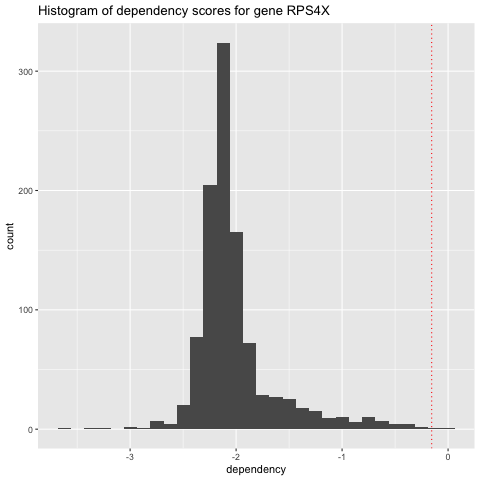

In [48]:
## Basic histogram
%R print(crispr %>% dplyr::select(gene, gene_name, dependency) %>% dplyr::filter(gene_name == "RPS4X") %>% ggplot(aes(x = dependency)) +geom_histogram() +geom_vline(xintercept = mean(crispr$dependency, na.rm = TRUE),linetype = "dotted", color = "red") + ggtitle("Histogram of dependency scores for gene RPS4X"));

We can now plot the distribution of dependency scores for gene RPS4X for each major type of cancer, while highlighting the nature of mutations of this gene in such cancer cell lines (e.g. if such are COSMIC hotspots, damaging, etc.). Notice that the plot above reflects the same overall distribution in two dimensions.

In [60]:
%R meta_crispr <- metadata %>% dplyr::select(depmap_id, lineage) %>% dplyr::full_join(crispr, by = "depmap_id") %>% dplyr::filter(gene_name == "RPS4X") %>%  dplyr::full_join((mutationCalls %>% dplyr::select(depmap_id, entrez_id, is_cosmic_hotspot, var_annotation)),by = c("depmap_id", "entrez_id"))


,depmap_id,lineage,gene,dependency,entrez_id,gene_name,cell_line,is_cosmic_hotspot,var_annotation
1,ACH-000001,ovary,RPS4X (6191),-2.148558,6191.0,RPS4X,NIHOVCAR3_OVARY,-2147483648,None
2,ACH-000004,leukemia,RPS4X (6191),-1.635768,6191.0,RPS4X,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-2147483648,None
3,ACH-000005,leukemia,RPS4X (6191),-1.588731,6191.0,RPS4X,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-2147483648,None
4,ACH-000007,colorectal,RPS4X (6191),-2.417373,6191.0,RPS4X,LS513_LARGE_INTESTINE,-2147483648,None
5,ACH-000009,colorectal,RPS4X (6191),-1.936328,6191.0,RPS4X,C2BBE1_LARGE_INTESTINE,-2147483648,None
...,...,...,...,...,...,...,...,...,...
1240278,ACH-002397,None,None,NaN,2158.0,None,None,0,other non-conserving
1240279,ACH-002397,None,None,NaN,139135.0,None,None,0,other non-conserving
1240280,ACH-002397,None,None,NaN,4100.0,None,None,0,other non-conserving
1240281,ACH-002397,None,None,NaN,2652.0,None,None,0,other non-conserving


In [ ]:
p1 <- meta_crispr %>% ggplot(aes(x = dependency, y = lineage)) +
      geom_point(alpha = 0.4, size = 0.5) +
      geom_point(data = subset(
         meta_crispr, var_annotation == "damaging"), color = "red") +
      geom_point(data = subset(
         meta_crispr, var_annotation == "other non-conserving"), color = "blue") +
      geom_point(data = subset(
         meta_crispr, var_annotation == "other conserving"), color = "cyan") +
      geom_point(data = subset(
         meta_crispr, is_cosmic_hotspot == TRUE), color = "orange") +
      geom_vline(xintercept=mean(meta_rnai$dependency, na.rm = TRUE),
                 linetype = "dotted", color = "red") +
      ggtitle("Scatterplot of dependency scores for gene RPS4X by lineage")
p1